# 변동훈
## 2021년 04월 08일

In [1]:
import matplotlib.pyplot as plt

In [2]:
import random

[95, 96, 103, 311, 341, 359, 466, 582, 586, 638, 685, 686, 791]


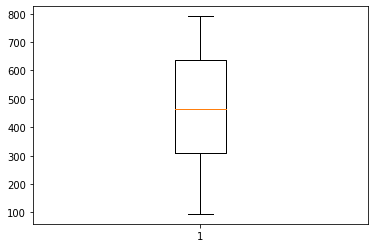

In [3]:
result = [random.randint(1,1000) for _ in range(13)]

print(sorted(result))

plt.boxplot(result)
plt.show()

In [4]:
import numpy as np

In [5]:
result = np.array(result)
print('1/4: ' + str(np.percentile(result, 25)))
print('2/4: ' + str(np.percentile(result, 50)))
print('3/4: ' + str(np.percentile(result, 75)))

1/4: 311.0
2/4: 466.0
3/4: 638.0


In [6]:
print(np.min(result))
print(np.max(result))

95
791


In [7]:
import csv

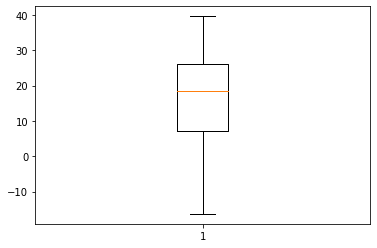

In [8]:
f = open('seoul.csv', encoding='euc-kr')
data = csv.reader(f)
next(data)
result = [float(row[-1]) for row in data if row[-1] != '']

plt.boxplot(result)
plt.show()

In [9]:
result = np.array(result)
print('1/4: ' + str(np.percentile(result, 25)))
print('2/4: ' + str(np.percentile(result, 50)))
print('3/4: ' + str(np.percentile(result, 75)))

1/4: 7.2
2/4: 18.6
3/4: 26.2


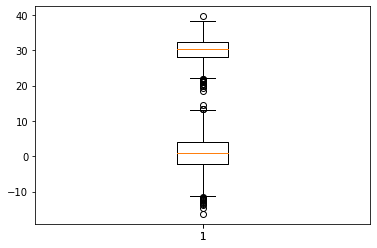

In [10]:
f = open('seoul.csv', encoding='euc-kr')
data = csv.reader(f)
next(data)
aug = []
jan = []

for row in data :
    month = row[0].split('-')[1]
    if row[-1] != '' :
        if month == '08':
            aug.append(float(row[-1]))
        if month == '01':
            jan.append(float(row[-1]))

plt.boxplot(aug)
plt.boxplot(jan)
plt.show()

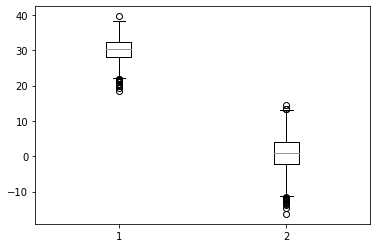

In [11]:
plt.boxplot([aug, jan])
plt.show()

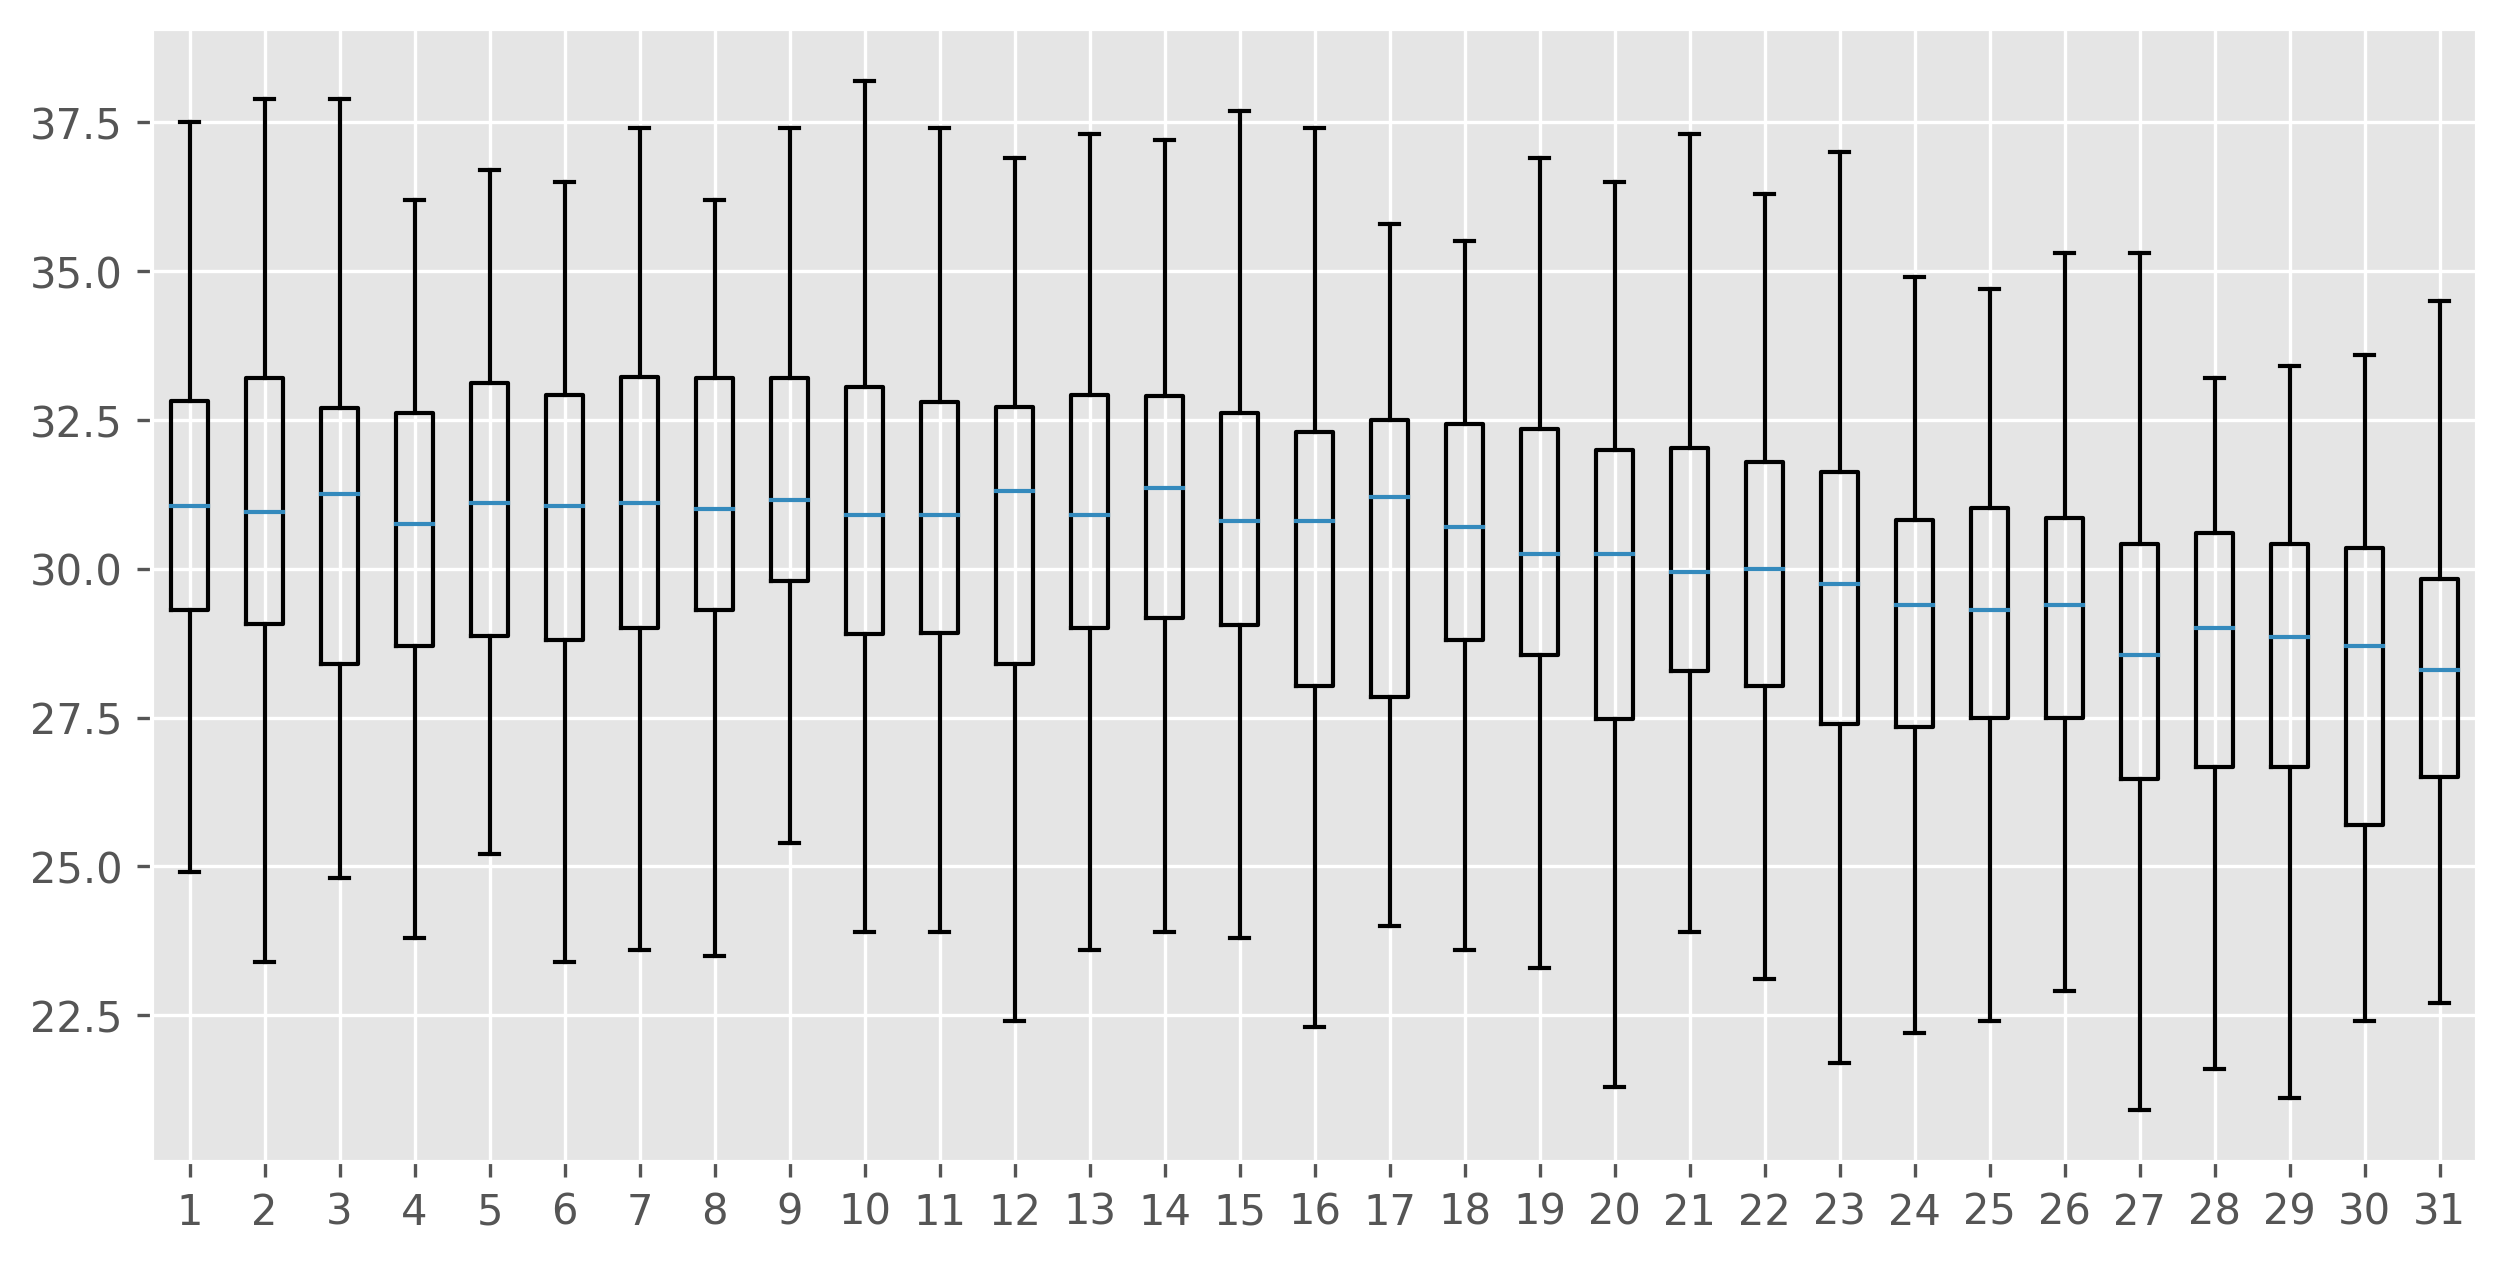

In [12]:
f = open('seoul.csv', encoding='euc-kr')
data = csv.reader(f)
next(data)
day = [[] for _ in range(31)]

for row in data :
    month = row[0].split('-')[1]
    if row[-1] != '' :
        if month == '08':
            day[int(row[0].split('-')[2])-1].append(float(row[-1]))

plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.boxplot(day, showfliers=False)

plt.show()

In [13]:
import pandas as pd

In [14]:
sample_1 = pd.read_excel('sample_1.xlsx', header=1, skipfooter=2, usecols='A:C')

In [15]:
sample_1.head(3)

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319


In [16]:
sample_1.tail(3)

,국적코드,성별,입국객수
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [17]:
sample_1

,국적코드,성별,입국객수
0,A01,남성,106320
1,A01,여성,191436
2,A31,남성,319
3,A31,여성,42
4,A18,남성,158912
5,A18,여성,232943


In [18]:
sample_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적코드    6 non-null      object
 1   성별      6 non-null      object
 2   입국객수    6 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 272.0+ bytes


In [19]:
sample_1.describe()

,입국객수
count,6.000000
mean,114995.333333
std,98105.752006
min,42.000000
25%,26819.250000
50%,132616.000000
75%,183305.000000
max,232943.000000


In [20]:
sample_1['입국객수']

0    106320
1    191436
2       319
3        42
4    158912
5    232943
Name: 입국객수, dtype: int64

In [21]:
sample_1[['국적코드', '입국객수']]

,국적코드,입국객수
0,A01,106320
1,A01,191436
2,A31,319
3,A31,42
4,A18,158912
5,A18,232943


In [22]:
sample_1['기준년월'] = '2019-11'
sample_1

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [23]:
condition = (sample_1['성별'] == '남성')
condition

0     True
1    False
2     True
3    False
4     True
5    False
Name: 성별, dtype: bool

In [24]:
sample_1[condition]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
2,A31,남성,319,2019-11
4,A18,남성,158912,2019-11


In [25]:
condition = sample_1['입국객수'] >= 150000
sample_1[condition]

,국적코드,성별,입국객수,기준년월
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [26]:
condition = (sample_1['입국객수'] >= 150000) & (sample_1['성별'] == '남성')
sample_1[condition]

,국적코드,성별,입국객수,기준년월
4,A18,남성,158912,2019-11


In [27]:
conditions = (sample_1['국적코드'] == 'A01') | (sample_1['국적코드'] == 'A18')
sample_1[conditions]

,국적코드,성별,입국객수,기준년월
0,A01,남성,106320,2019-11
1,A01,여성,191436,2019-11
4,A18,남성,158912,2019-11
5,A18,여성,232943,2019-11


In [28]:
conditions = (sample_1['국적코드'].isin(['A01', 'A18']))
conditions

0     True
1     True
2    False
3    False
4     True
5     True
Name: 국적코드, dtype: bool

In [29]:
sample_1[conditions == False]

,국적코드,성별,입국객수,기준년월
2,A31,남성,319,2019-11
3,A31,여성,42,2019-11


In [30]:
code_master = pd.read_excel('sample_codemaster.xlsx')

In [31]:
code_master

,국적코드,국적명
0,A01,일본
1,A02,대만
2,A03,홍콩
3,A18,중국
4,A19,이란
5,A22,우즈베키스탄
6,A23,카자흐스탄
7,A99,아시아 기타


In [32]:
sample_1_code = pd.merge(left=sample_1, right=code_master, how='inner'
                         , left_on='국적코드', right_on='국적코드')
sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A18,남성,158912,2019-11,중국
3,A18,여성,232943,2019-11,중국


In [33]:
sample_1_code = pd.merge(left=sample_1, right=code_master, how='left'
                         , left_on='국적코드', right_on='국적코드')
sample_1_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국


In [34]:
sample_2 = pd.read_excel('sample_2.xlsx', header=1, skipfooter=2, usecols='A:C')

In [35]:
sample_2['기준년월'] = '2019-12'

In [36]:
sample_2_code = pd.merge(left=sample_2, right=code_master, how='left'
                         , left_on='국적코드', right_on='국적코드')
sample_2_code

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,92556,2019-12,일본
1,A01,여성,163737,2019-12,일본
2,A18,남성,155540,2019-12,중국
3,A18,여성,249023,2019-12,중국


In [37]:
sample = sample_1_code.append(sample_2_code, ignore_index=True)
sample

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


In [38]:
sample_c = pd.concat([sample_1_code, sample_2_code], ignore_index=True)
sample_c

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
6,A01,남성,92556,2019-12,일본
7,A01,여성,163737,2019-12,일본
8,A18,남성,155540,2019-12,중국
9,A18,여성,249023,2019-12,중국


In [39]:
sample_1_code.append(sample_2_code)

,국적코드,성별,입국객수,기준년월,국적명
0,A01,남성,106320,2019-11,일본
1,A01,여성,191436,2019-11,일본
2,A31,남성,319,2019-11,NaN
3,A31,여성,42,2019-11,NaN
4,A18,남성,158912,2019-11,중국
5,A18,여성,232943,2019-11,중국
0,A01,남성,92556,2019-12,일본
1,A01,여성,163737,2019-12,일본
2,A18,남성,155540,2019-12,중국
3,A18,여성,249023,2019-12,중국


In [40]:
sample.to_excel('sample.xlsx')

In [41]:
sample.to_excel('sample_index_false.xlsx', index=False)

In [42]:
sample_pivot = sample.pivot_table(values='입국객수', index='국적명'
                                  , columns='기준년월', aggfunc='mean')

In [43]:
sample_pivot

기준년월,2019-11,2019-12
국적명,,
일본,148878.0,128146.5
중국,195927.5,202281.5


In [44]:
sample_pivot_2 = sample.pivot_table(values='입국객수', index='국적명', aggfunc='max')

In [45]:
sample_pivot_2

,입국객수
국적명,
일본,191436
중국,249023


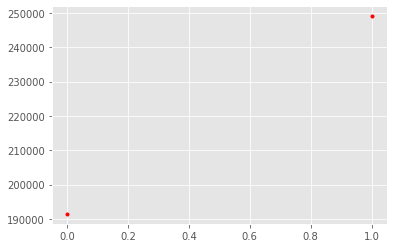

In [76]:
plt.plot(sample_pivot_2.index,sample_pivot_2.values, 'r.')


In [46]:
from selenium import webdriver

In [47]:
driver = webdriver.Chrome('/Users/donghunbyun/Desktop/workspace/jupyter/bigdata/chromedriver')

In [48]:
url = 'https://www.daum.net/'
driver.get(url)

<html lang="ko" class="os_mac"><head>
<meta charset="utf-8">
<title>Daum</title>
<meta property="og:url" content="https://www.daum.net/">
<meta property="og:type" content="website">
<meta property="og:title" content="Daum">
<meta property="og:image" content="//i1.daumcdn.net/svc/image/U03/common_icon/5587C4E4012FCD0001">
<meta property="og:description" content="나의 관심 콘텐츠를 가장 즐겁게 볼 수 있는 Daum">
<meta name="msapplication-task" content="name=Daum;action-uri=https://www.daum.net/;icon-uri=/favicon.ico">
<meta name="msapplication-task" content="name=미디어다음;action-uri=https://news.daum.net/;icon-uri=/media_favicon.ico">
<meta name="msapplication-task" content="name=메일;action-uri=http://mail.daum.net;icon-uri=/mail_favicon.ico">
<meta name="referrer" content="origin">
<link rel="search" type="application/opensearchdescription+xml" href="//search.daum.net/OpenSearch.xml" title="다음">
<script type="text/javascript" src="//t1.daumcdn.net/tiara/js/v1/tiara.min.js"></script>
<style type="text/css">
@
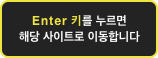
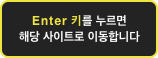
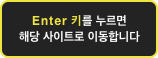
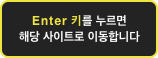

In [49]:
html = driver.page_source
print(html)

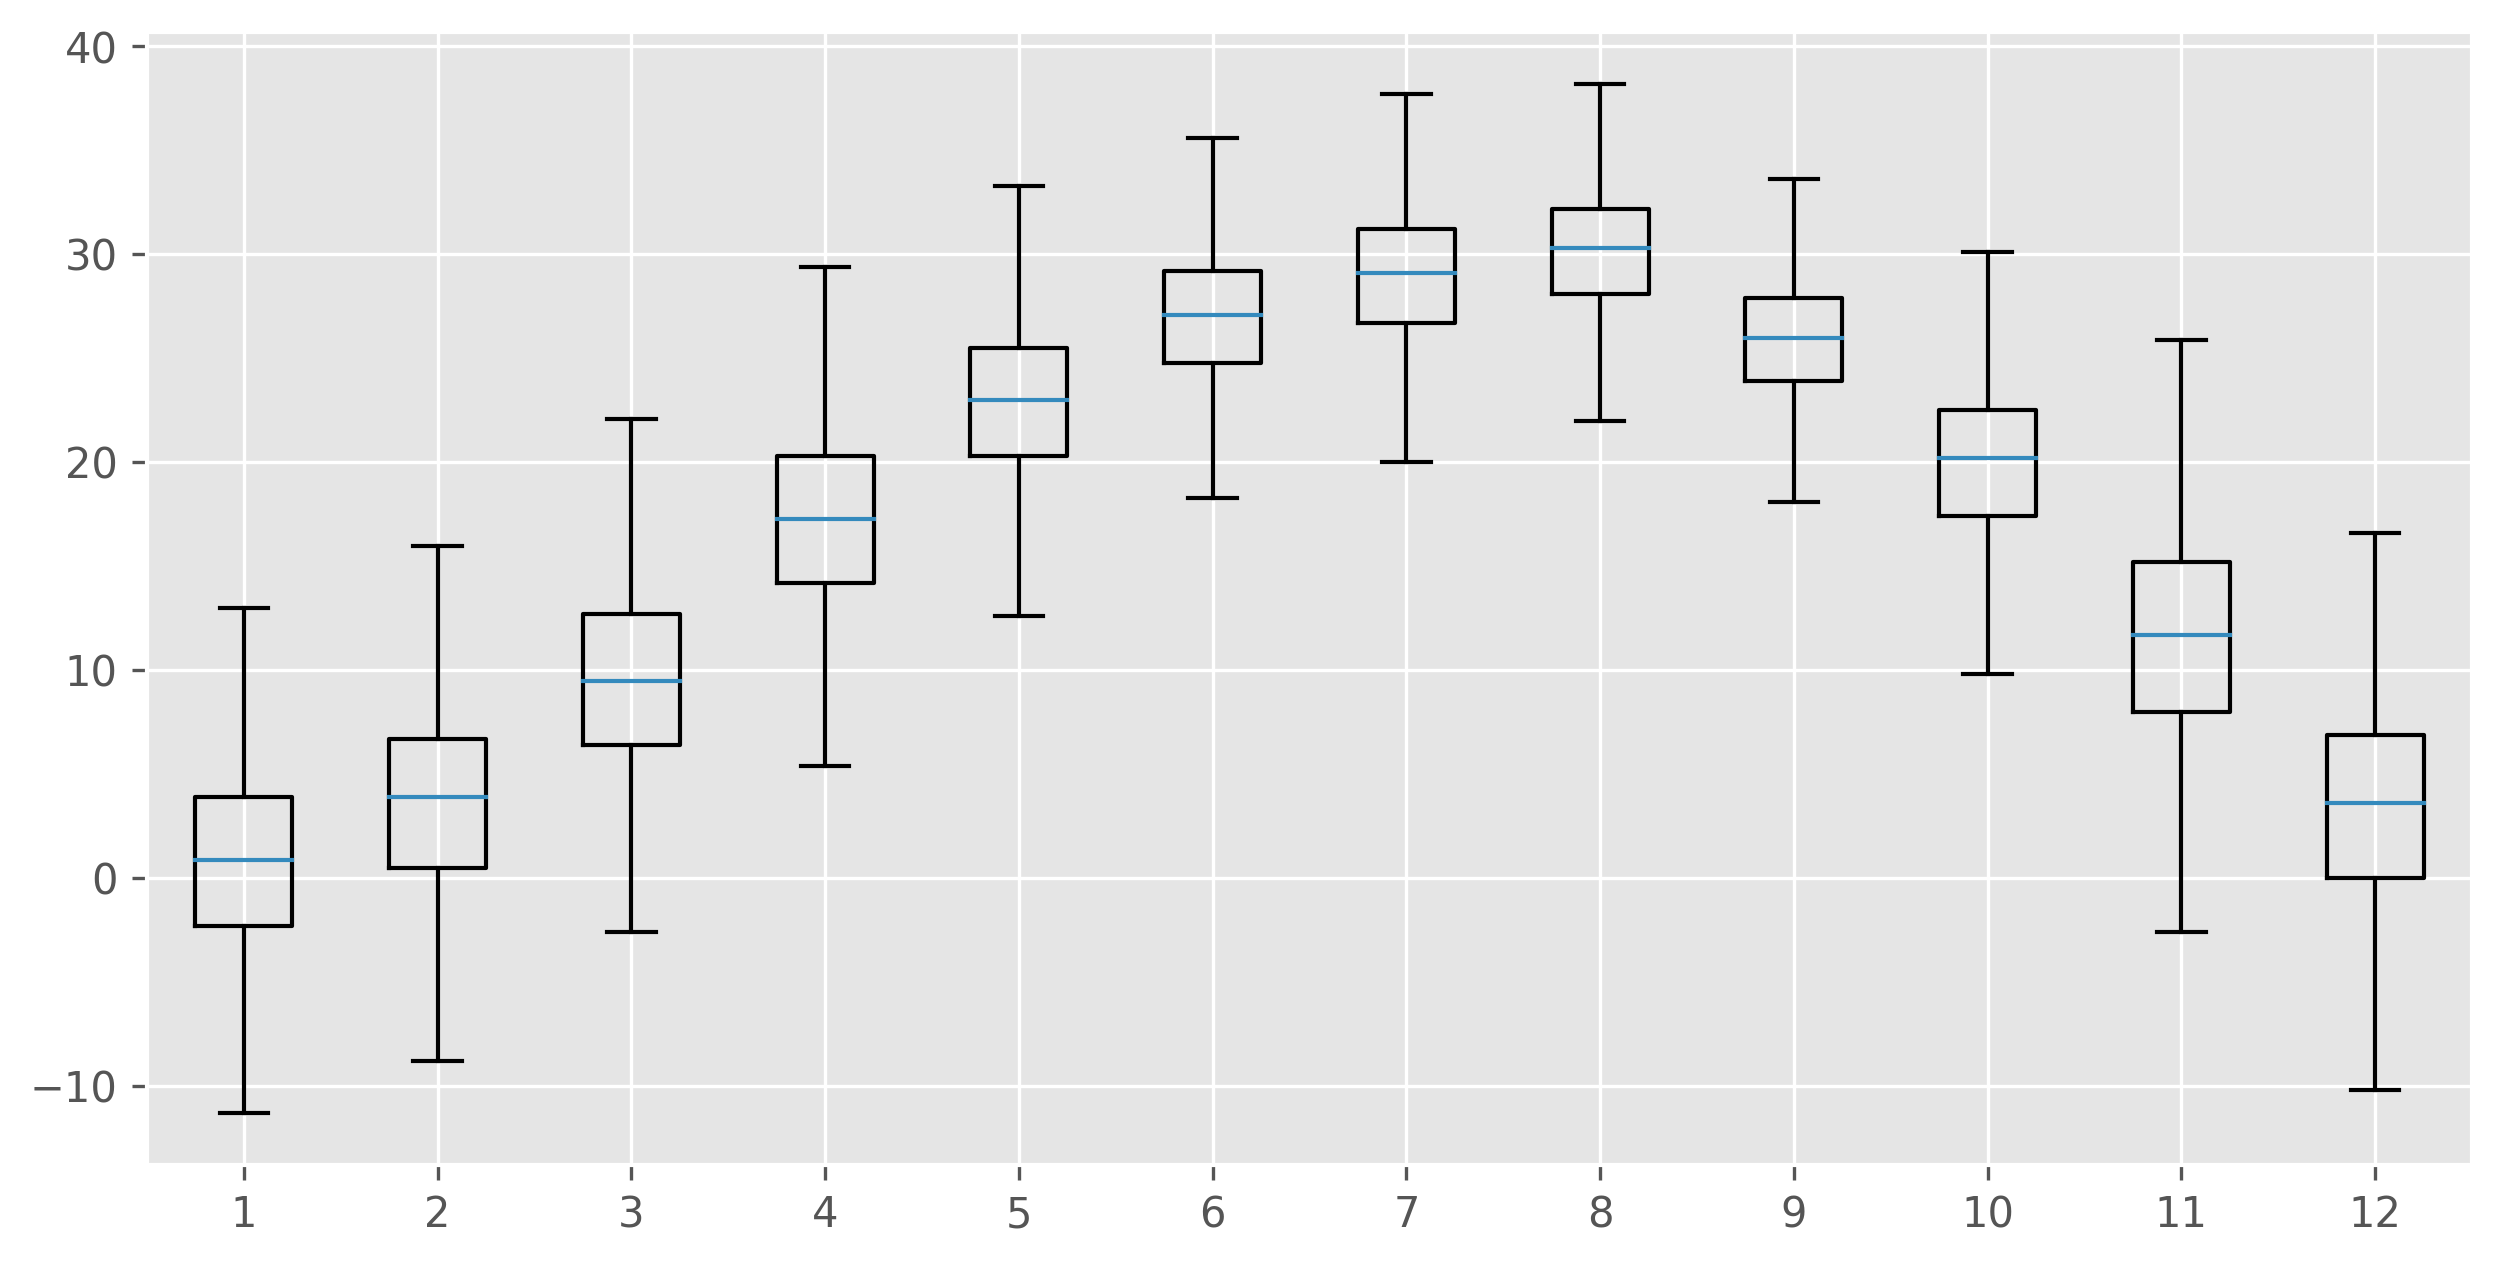

In [50]:
f = open('seoul.csv', encoding='euc-kr')
data = csv.reader(f)
next(data)
month = [[] for _ in range(12)]

for row in data :
    if row[-1] != '' :
        month[int(row[0].split('-')[1])-1].append(float(row[-1]))

plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.boxplot(month, showfliers=False)

plt.show()

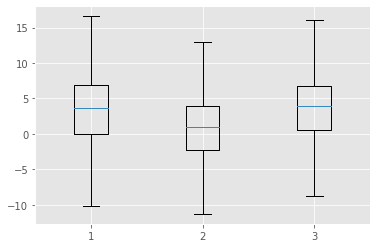

In [51]:
f = open('seoul.csv', encoding='euc-kr')
data = csv.reader(f)
next(data)
winter = [[] for _ in range(3)]

for row in data :
    month = row[0].split('-')[1]
    if row[-1] != '' :
        if month == '12':
            winter[0].append(float(row[-1]))
        elif month == '01':
            winter[1].append(float(row[-1]))
        elif month == '02':
            winter[2].append(float(row[-1]))

plt.style.use('ggplot')
plt.boxplot(winter, showfliers=False)

plt.show()

In [52]:
customer_master = pd.read_csv('customer_master.csv')

In [53]:
customer_master

,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,IK152942,김서준,2019-01-01 0:25,hirata_yuujirou@example.com,M,29,1990-06-10,대전광역시
1,TS808488,김예준,2019-01-01 1:13,tamura_shiori@example.com,F,33,1986-05-20,인천광역시
2,AS834628,김도윤,2019-01-01 2:00,hisano_yuki@example.com,F,63,1956-01-02,광주광역시
3,AS345469,김시우,2019-01-01 4:48,tsuruoka_kaoru@example.com,M,74,1945-03-25,인천광역시
4,GD892565,김주원,2019-01-01 4:54,oouchi_takashi@example.com,M,54,1965-08-05,울산광역시
...,...,...,...,...,...,...,...,...
4995,AS677229,정우석,2019-07-31 16:52,hirayama_risa@example.com,F,77,1941-10-17,대전광역시
4996,HD758694,정영훈,2019-07-31 19:09,nakahara_mahiru@example.com,F,27,1991-11-13,광주광역시
4997,PL538517,정준기,2019-07-31 19:30,tabata_yuu1@example.com,F,73,1945-12-28,대전광역시
4998,OA955088,정도형,2019-07-31 22:32,setouchi_hikaru@example.com,F,75,1944-04-09,부산광역시


In [54]:
item_master = pd.read_csv('item_master.csv')

In [55]:
item_master

,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [56]:
transaction_1 = pd.read_csv('transaction_1.csv')

In [57]:
transaction_1

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
4995,T0000005108,210000,2019-06-15 02:42:41,HD315748
4996,T0000005109,150000,2019-06-15 03:36:16,HI215420
4997,T0000005110,50000,2019-06-15 03:44:06,IK880102
4998,T0000005111,210000,2019-06-15 04:14:06,IK074758


In [58]:
transaction_2 = pd.read_csv('transaction_2.csv')

In [59]:
transaction_2

,transaction_id,price,payment_date,customer_id
0,T0000005113,295000,2019-06-15 07:20:27,TS169261
1,T0000005114,50000,2019-06-15 07:35:47,HI599892
2,T0000005115,85000,2019-06-15 07:56:36,HI421757
3,T0000005116,50000,2019-06-15 08:40:55,OA386378
4,T0000005117,120000,2019-06-15 08:44:23,TS506913
...,...,...,...,...
1781,T0000006894,180000,2019-07-31 21:20:44,HI400734
1782,T0000006895,85000,2019-07-31 21:52:48,AS339451
1783,T0000006896,100000,2019-07-31 23:35:25,OA027325
1784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [60]:
transaction_detail_1 = pd.read_csv('transaction_detail_1.csv')

In [61]:
transaction_detail_1

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
4995,4995,T0000004865,S003,1
4996,4996,T0000004866,S001,3
4997,4997,T0000004867,S001,3
4998,4998,T0000004868,S005,1


In [62]:
transaction_detail_2 = pd.read_csv('transaction_detail_2.csv')

In [63]:
transaction_detail_2

,detail_id,transaction_id,item_id,quantity
0,5000,T0000004870,S002,3
1,5001,T0000004871,S003,1
2,5002,T0000004872,S001,2
3,5003,T0000004873,S004,1
4,5004,T0000004874,S003,2
...,...,...,...,...
2139,7139,T0000006894,S004,1
2140,7140,T0000006895,S002,1
2141,7141,T0000006896,S001,2
2142,7142,T0000006897,S002,1


In [64]:
transaction = transaction_1.append(transaction_2, ignore_index=True)

In [65]:
transaction

,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865
...,...,...,...,...
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738


In [66]:
transaction_detail = pd.concat([transaction_detail_1, transaction_detail_2]
                               , ignore_index=True)

In [67]:
transaction_detail

,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2
...,...,...,...,...
7139,7139,T0000006894,S004,1
7140,7140,T0000006895,S002,1
7141,7141,T0000006896,S001,2
7142,7142,T0000006897,S002,1


customer_master 파일과 transaction 파일은 서로 customer_id란 공통 컬럼으로 가로 병합 가능

item_master 파일과 transaction_detail 파일은 서로 item_id란 공통 컬럼으로 가로 병합 가능

위의 2개의 병합 파일을 transaction_id란 공통 컬럼으로 가로 병합 가능

In [68]:
transaction_customer = pd.merge(left=transaction, right=customer_master,
                                how='left', left_on='customer_id'
                                , right_on='customer_id')

In [69]:
transaction_customer

,transaction_id,price,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시
...,...,...,...,...,...,...,...,...,...,...,...
6781,T0000006894,180000,2019-07-31 21:20:44,HI400734,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시
6782,T0000006895,85000,2019-07-31 21:52:48,AS339451,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시
6783,T0000006896,100000,2019-07-31 23:35:25,OA027325,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시
6784,T0000006897,85000,2019-07-31 23:39:35,TS624738,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시


In [70]:
transaction_detail_item = pd.merge(left=transaction_detail, right=item_master,
                                  how='left', left_on='item_id', right_on='item_id')

In [71]:
transaction_detail_item

,detail_id,transaction_id,item_id,quantity,item_name,item_price
0,0,T0000000113,S005,1,PC-E,210000
1,1,T0000000114,S001,1,PC-A,50000
2,2,T0000000115,S003,1,PC-C,120000
3,3,T0000000116,S005,1,PC-E,210000
4,4,T0000000117,S002,2,PC-B,85000
...,...,...,...,...,...,...
7139,7139,T0000006894,S004,1,PC-D,180000
7140,7140,T0000006895,S002,1,PC-B,85000
7141,7141,T0000006896,S001,2,PC-A,50000
7142,7142,T0000006897,S002,1,PC-B,85000


In [72]:
transaction_data = pd.merge(left=transaction_customer, right=transaction_detail_item,
                           how='right', left_on='transaction_id', right_on='transaction_id')

In [73]:
transaction_data

,transaction_id,price,payment_date,customer_id,customer_name,registration_date,email,gender,age,birth,pref,detail_id,item_id,quantity,item_name,item_price
0,T0000000113,210000,2019-02-01 01:36:57,PL563502,김태경,2019-01-07 14:34,imoto_yoshimasa@example.com,M,30,1989-07-15,대전광역시,0,S005,1,PC-E,210000
1,T0000000114,50000,2019-02-01 01:37:23,HD678019,김영웅,2019-01-27 18:00,mifune_rokurou@example.com,M,73,1945-11-29,서울특별시,1,S001,1,PC-A,50000
2,T0000000115,120000,2019-02-01 02:34:19,HD298120,김강현,2019-01-11 8:16,yamane_kogan@example.com,M,42,1977-05-17,광주광역시,2,S003,1,PC-C,120000
3,T0000000116,210000,2019-02-01 02:47:23,IK452215,김주한,2019-01-10 5:07,ikeda_natsumi@example.com,F,47,1972-03-17,인천광역시,3,S005,1,PC-E,210000
4,T0000000117,170000,2019-02-01 04:33:46,PL542865,김영빈,2019-01-25 6:46,kurita_kenichi@example.com,M,74,1944-12-17,광주광역시,4,S002,2,PC-B,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7139,T0000006894,180000,2019-07-31 21:20:44,HI400734,김윤성,2019-01-04 13:24,shishido_akira@example.com,M,64,1955-01-13,대구광역시,7139,S004,1,PC-D,180000
7140,T0000006895,85000,2019-07-31 21:52:48,AS339451,김무경,2019-02-11 19:34,aihara_miki@example.com,F,74,1945-02-03,대구광역시,7140,S002,1,PC-B,85000
7141,T0000006896,100000,2019-07-31 23:35:25,OA027325,박준석,2019-04-17 9:23,matsuda_saki@example.com,F,40,1979-05-25,서울특별시,7141,S001,2,PC-A,50000
7142,T0000006897,85000,2019-07-31 23:39:35,TS624738,이가빈,2019-02-20 18:15,shinndou_masatoshi@example.com,M,56,1963-02-21,인천광역시,7142,S002,1,PC-B,85000


In [74]:
transaction_data.to_excel('transaction_data.xlsx')